Made some mistakes in the other notebooks, will doing PCA on all the hbd sets here.

In [1]:
#importing libraries
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
import requests
import json
import sys

In [2]:
#helping make the seaborn plots prettier
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=2)
sns.set_style('whitegrid')

Reading in all hbd data sets 

In [3]:
#nist dataset
webscraped_hbd = pd.read_csv('../pubchem/webscrapped_hbd.csv')

In [4]:
webscraped_hbd

,HBD,CID
0,urea,1176
1,glycerol,753
2,propanedioic acid,867
3,triethylene glycol,8172
4,"1,2-ethanediol",174
5,4-methylbenzenesulfonic acid,6101
6,citric acid,311
7,ethanedioic acid,971
8,"2,2,2-trifluoroacetamide",67717
9,4-oxopentanoic acid,11579


Need smiles for this set

In [5]:
#adding path to pubchem folder which contains the get_properties function
sys.path.insert(0,'../pubchem/')

In [6]:
from get_properties import get_properties

In [7]:
webscraped_hbd = get_properties(webscraped_hbd, 'canonical_smiles', 'CID', 'HBD_' )

In [8]:
webscraped_hbd

,HBD,CID,HBD_CanonicalSMILES
0,urea,1176,C(=O)(N)N
1,glycerol,753,C(C(CO)O)O
2,propanedioic acid,867,C(C(=O)O)C(=O)O
3,triethylene glycol,8172,C(COCCOCCO)O
4,"1,2-ethanediol",174,C(CO)O
5,4-methylbenzenesulfonic acid,6101,CC1=CC=C(C=C1)S(=O)(=O)O
6,citric acid,311,C(C(=O)O)C(CC(=O)O)(C(=O)O)O
7,ethanedioic acid,971,C(=O)(C(=O)O)O
8,"2,2,2-trifluoroacetamide",67717,C(=O)(C(F)(F)F)N
9,4-oxopentanoic acid,11579,CC(=O)CCC(=O)O


In [9]:
#Expanded dataset afetr retrieving similar compounds from pubchem
similar_hbd = pd.read_csv('../pubchem/similar_compiled_HBD.csv')

In [10]:
similar_hbd

,HBD_cid,HBD_smiles
0,1176,C(=O)(N)N
1,11457650,C(=O)(N)N
2,636363,C(=O)(N)N
3,101721,C(=O)(N)N.Cl
4,53411231,C(=O)(N)N.Br
5,10197611,C(=O)(N)N
6,2723980,C(=O)(N)N
7,181299,C(=O)(N)N.S
8,86736265,C(=O)(N)N.[Na]
9,86596646,[HH].C(=O)(N)N


In [11]:
#basis set after applying engineering metrics
basis_hbd = pd.read_csv('../pubchem/HBD_basis_set.csv')

In [12]:
basis_hbd

,HBD_cid,HBD_smiles,Vendor Status,GHS_info,Health Score,SCALED Health,HEALTH PI,Environmental Score,SCALED ENV,ENV PI,HBD_InChIKey,HBD_MolecularFormula,HBD_MolecularWeight,SCALED MW,MW PI,HBD_mp,TOTAL PI,RANK
0,1176,C(=O)(N)N,True,Not classified as a hazardous substance,0,100.000000,55.000000,0,100.000000,18.000000,XSQUKJJJFZCRTK-UHFFFAOYSA-N,CH4N2O,60.056,99.990009,26.997303,132,99.997303,1
1,522583,CC(N)O,True,"['H315', 'H319']",20,97.701149,53.735632,0,100.000000,18.000000,UJPKMTDFFUTLGM-UHFFFAOYSA-N,C2H7NO,61.080,98.313687,26.544695,no mp data,98.280328,2
2,71309146,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.000000,18.000000,KFZMGEQAYNKOFK-VMIGTVKRSA-N,C3H8O,63.073,95.207141,25.705928,no mp data,94.912825,3
3,12213345,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.000000,18.000000,KFZMGEQAYNKOFK-FIBGUPNXSA-N,C3H8O,63.110,95.151323,25.690857,no mp data,94.897754,4
4,11182567,CC(=O)O,True,"['H226', 'H312', 'H314']",75,91.379310,50.258621,0,100.000000,18.000000,QTBSBXVTEAMEQO-ZDOIIHCHSA-N,C2H4O2,62.037,96.797073,26.135210,no mp data,94.393830,5
5,2733137,C(CO)O,True,['H302'],50,94.252874,51.839080,0,100.000000,18.000000,LYCAIKOWRPUZTN-LNLMKGTHSA-N,C2H6O2,66.090,90.860947,24.532456,no mp data,94.371536,6
6,1030,CC(CO)O,True,Not classified as a hazardous substance,0,100.000000,55.000000,0,100.000000,18.000000,DNIAPMSPPWPWGF-UHFFFAOYSA-N,C3H8O2,76.090,78.919700,21.308319,-59,94.308319,7
7,12213346,CC(C)O,True,"['H225', 'H319', 'H336']",60,93.103448,51.206897,0,100.000000,18.000000,KFZMGEQAYNKOFK-WFGJKAKNSA-N,C3H8O,66.130,90.805988,24.517617,no mp data,93.724513,8
8,10442,C(CO)CO,True,['H315'],10,98.850575,54.367816,0,100.000000,18.000000,YPFDHNVEDLHUCE-UHFFFAOYSA-N,C3H8O2,76.090,78.919700,21.308319,-26.7,93.676135,9
9,439846,CC(CO)O,True,['H319'],10,98.850575,54.367816,0,100.000000,18.000000,DNIAPMSPPWPWGF-VKHMYHEASA-N,C3H8O2,76.090,78.919700,21.308319,no mp data,93.676135,9


Here are the functions we will define that will create "fingerprints" for the chemicals. These fingerprints are sort of a way to digitize the chemical structure so this way we can look at similarities/differences and visualize them on plots. The SMILES string will be used to grab the fingerprints from rdkit.

In [13]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol == None:                  #added this in to skip None as they returned sometimes in the line before
            pass
        else:
            fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

Grabbing the fingerprints

In [14]:
#webscrapped set
web_hbd_fp_list = fp_list_from_smiles_list(webscraped_hbd.HBD_CanonicalSMILES)

#expanded set
similar_hbd_fp_list = fp_list_from_smiles_list(similar_hbd.HBD_smiles)

#basis set
basis_hbd_fp_list = fp_list_from_smiles_list(basis_hbd.HBD_smiles)

100%|████████████████████████████████████████████████████████████████████████████| 3477/3477 [00:00<00:00, 5503.09it/s]


Creating the PCA variable, using 2048 bit fingerprint and 2 PC

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 

Fitting the fingerprints to the PCA

In [16]:
#webscrapped set
web_hbd_crds = pca.fit_transform(web_hbd_fp_list)

#expanded set
similar_hbd_crds = pca.transform(similar_hbd_fp_list)  #take off "fit" so it uses components from first dataset

#basis set
basis_hbd_crds = pca.transform(basis_hbd_fp_list)

Saving into dataframes

In [17]:
#webscrapped set
web_hbd_crds_df = pd.DataFrame(web_hbd_crds,columns=["PC_1","PC_2"])

#expanded set
similar_hbd_crds_df = pd.DataFrame(similar_hbd_crds, columns=["PC_1","PC_2"])

#basis set
basis_hbd_crds_df = pd.DataFrame(basis_hbd_crds, columns=["PC_1","PC_2"])

Plotting

[(-3, 3)]

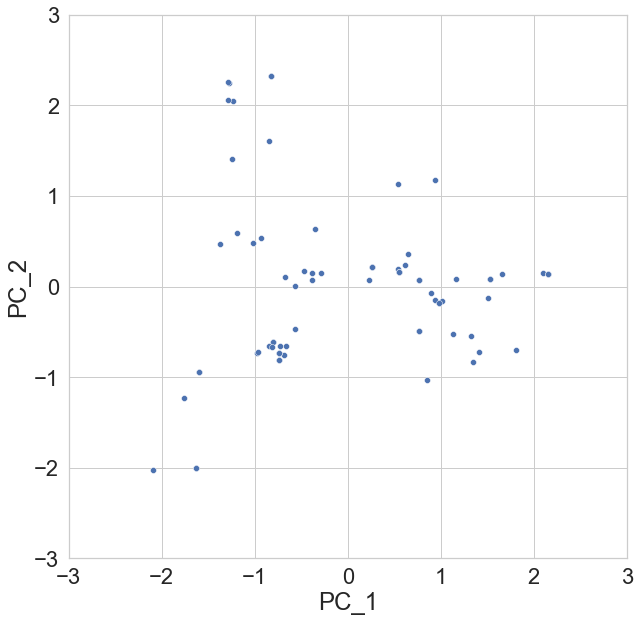

In [29]:
#webscrapped set
ax1 = sns.scatterplot(data=web_hbd_crds_df,x="PC_1",y="PC_2", )
ax1.set(ylim = (-3,3))
ax1.set(xlim = (-3,3))
#plt.show()
#plt.savefig('hbd_webscrapped_space.png')

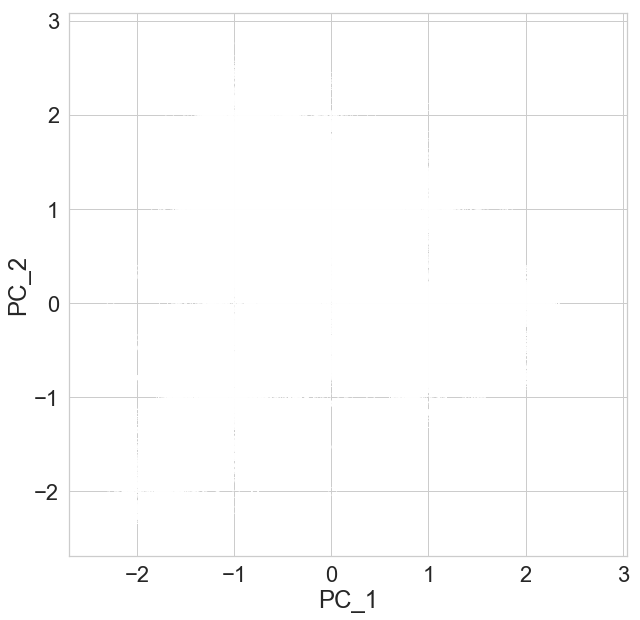

In [24]:
#expanded set
ax2 = sns.scatterplot(data=similar_hbd_crds_df,x="PC_1",y="PC_2", s = 60)
#plt.savefig('hbd_expanded_space.png')
plt.show()

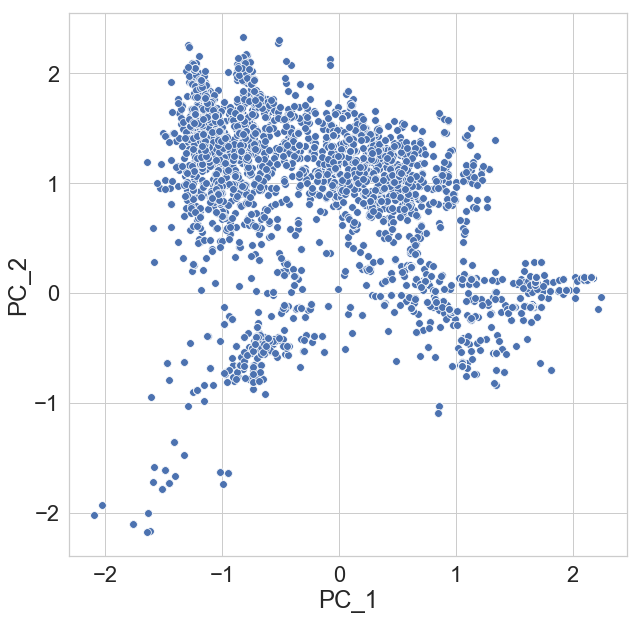

In [47]:
#basis_set
ax3 = sns.scatterplot(data=basis_hbd_crds_df,x="PC_1",y="PC_2", s = 60)
plt.savefig('hbd_basis_space.png')
plt.show()

If we want to further anlyze the basis set plot by looking at the diversity of the candiates by their structures, we will need a better variance as currently it is at 20%.

In [22]:
var = np.sum(pca.explained_variance_ratio_)
var

0.20928956176307478

Let's se how the variance changes with the number of components.

In [30]:
def evaluate_components(fp_list):
    res = []
    for n_comp in tqdm(range(2,50)): 
        pca = PCA(n_components=n_comp)
        crds = pca.fit_transform(fp_list) 
        var = np.sum(pca.explained_variance_ratio_)
        res.append([n_comp,var])
    return res


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:10<00:00,  4.64it/s]


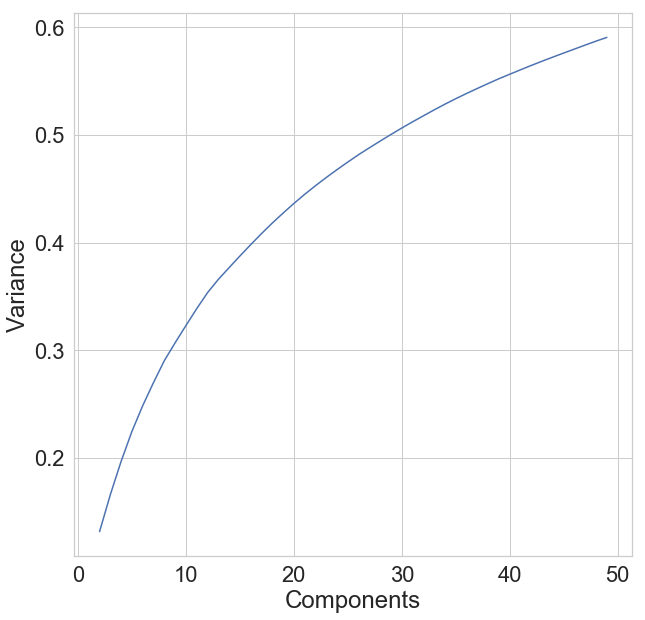

In [31]:
# Run the function above on our fingerprint list
basis_hbd_comp_res = evaluate_components(basis_hbd_fp_list)

#Put these results into a dataframe
basis_hbd_res_df = pd.DataFrame(basis_hbd_comp_res,columns=["Components","Variance"])

#Make a line plot of the number of components vs the variance explained
ax4 = sns.lineplot(data=basis_hbd_res_df,x="Components",y="Variance")

Variance seems to level off after 50 components. We will make a new PCA with 50 principal components, and then use t-distributed stochastic neighbor embedding to reduce the dimensions.

In [32]:
hbd_pca = PCA(n_components=50)
hbd_crds = hbd_pca.fit_transform(basis_hbd_fp_list)

Use t-sne to reduce dimensions

In [33]:
from sklearn.manifold import TSNE
%time hbd_crds_embedded = TSNE(n_components=2).fit_transform(hbd_crds)

Wall time: 22.1 s


In [34]:
#adding to df
hbd_tsne_df = pd.DataFrame(hbd_crds_embedded,columns=["X","Y"])
hbd_tsne_df.head()

,X,Y
0,-34.911652,29.599581
1,-63.656921,16.410173
2,-62.669167,16.095873
3,-62.668095,16.095135
4,-32.310570,31.257702


We can also add the ranking from the basis set after applying the engineering metrics performance. The dataset was already in order of ranking so the length of the fp list will give us the ranking.

In [35]:
len(basis_hbd_fp_list)

3477

In [36]:
basis_hbd_fp_rank = list(range(1, 3478))

In [37]:
hbd_tsne_df['rank'] = basis_hbd_fp_rank

In [38]:
hbd_tsne_df.head()

,X,Y,rank
0,-34.911652,29.599581,1
1,-63.656921,16.410173,2
2,-62.669167,16.095873,3
3,-62.668095,16.095135,4
4,-32.310570,31.257702,5


We can plot this out with a colorbar to show the ranking as well

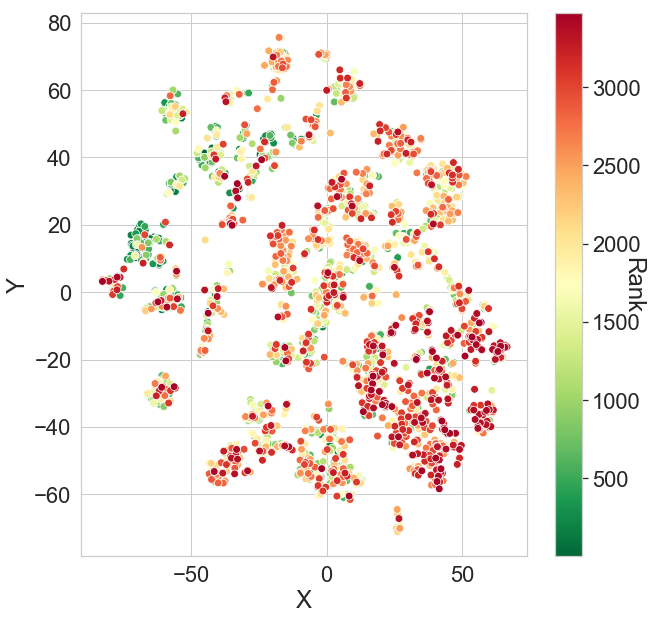

In [48]:
norm = plt.Normalize(basis_hbd['RANK'].min(), basis_hbd['RANK'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)

sm.set_array([])


ax = sns.scatterplot(data=hbd_tsne_df,x="X",y="Y", hue = 'rank', palette = "RdYlGn_r", legend = False, s = 60 )


cbar = plt.colorbar(sm)
cbar.set_label('Rank', rotation = 270)

plt.savefig('hbd_basis_set_ranked.png')
plt.show()

In [44]:
hbd_tsne_df.to_csv('hbd_tsne_df.csv', index = False)